## Visualizing result from tensorboard. 
#### from tutorial: https://www.tensorflow.org/tensorboard/dataframe_api

#### The following packages are required:  
```
pip install tensorboard pandas
pip install matplotlib seaborn
```

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use(r"configs/paper_plot_style.mplstyle")
# plt.style.use("paper_plot_style.mplstyle")
import seaborn as sns
import json
from scipy import stats
import tensorboard as tb
import re
import os

import pathlib
%matplotlib inline

## Helper functions

In [13]:
def parse_key(reg_exp, str_to_parse):
    """_summary_

    Args:
        reg_exp (_type_): _description_
        str_to_parse (_type_): _description_

    Returns:
        _type_: _description_
    """
    found = re.findall(reg_exp, str_to_parse)
    result = "seed_n/a"
    if found:
        result = found[0].replace('=', '_')
    print(f"found: {result}")
    return result
    
    
pattern = re.compile('seed=\d+')
parse_key(pattern, 'isthiswhatuplookingforD:\OneDrive - University of New Mexico\PhD\Dissertation\Papers\2_journal_article\results\variance_test\cuas_4v1o5_2022-12-24-10-16_a6d1d18\variance_long\MyTrainer_cuas_multi_agent-v1_4v1o5_f763f_00000_0_custom_model=TorchFixModel,seed=123_2022-12-24_10-16-40\progress.csv')
    

found: seed_123


'seed_123'

In [14]:
# Get 
def get_progress(basedir, string_pattern, filter_list):
    """Give a base directory, the get progress.csv file and parse it

    Args:
        basedir (_type_): _description_
        string_pattern (_type_): _description_
        filter_list (_type_): _description_

    Returns:
        _type_: _description_
    """
    basedir_path = pathlib.Path(basedir)
    all_progress = basedir_path.glob("**/progress.csv")

    df_list = []
    df_keys = []
    pattern = re.compile(string_pattern)

    for progress in all_progress:
        print(progress.absolute())
        # filter_list = ["policy_reward_mean/pursuer", "training_iteration"]

        df_list.append(pd.read_csv(str(progress.absolute())).filter(items=filter_list))
        df_keys.append(parse_key(pattern, str(progress.absolute())))

    df = pd.concat(df_list, keys=df_keys, names=["experiment_name"]).reset_index()

    return df

### Constants


In [15]:
# CONSTANTS
image_output_folder = (
    r"/home/prime/Documents/workspace/rl_multi_uav_sim/results/temp_output"
)
filter_list = [
    "training_iteration",
    "time_total_s",
    "timesteps_total",
    "custom_metrics/obstacle_collisions_mean",
    "custom_metrics/uav_collisions_mean",
    "custom_metrics/uav_dt_go_mean",
    "custom_metrics/num_uav_landed_mean",
    "custom_metrics/uav_done_dt_mean",
    "custom_metrics/uav_rel_dist_mean",
    "policy_reward_mean/shared_policy"
]
labels_to_plot = [
    'PPO',
    'PPO_CUR',
]

In [16]:
basedir = r'/home/prime/Documents/workspace/rl_multi_uav_sim/results/PPO/multi-uav-sim-v0_2023-11-07-08-16_80188c6/low_stp/PPO_multi-uav-sim-v0_d51c0_00000_0_beta=0.3000,d_thresh=0.0100,obstacle_collision_weight=0.1000,stp_penalty=5,t_go_max=2.0000,tgt__2023-11-07_08-16-16/'
df_ppo_no_cur= get_progress(basedir, r"stp_penalty=.*\d+", filter_list)
df_ppo_no_cur.head


/home/prime/Documents/workspace/rl_multi_uav_sim/results/PPO/multi-uav-sim-v0_2023-11-07-08-16_80188c6/low_stp/PPO_multi-uav-sim-v0_d51c0_00000_0_beta=0.3000,d_thresh=0.0100,obstacle_collision_weight=0.1000,stp_penalty=5,t_go_max=2.0000,tgt__2023-11-07_08-16-16/progress.csv
found: stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_08-16-16


<bound method NDFrame.head of                                        experiment_name  level_1  \
0    stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...        0   
1    stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...        1   
2    stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...        2   
3    stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...        3   
4    stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...        4   
..                                                 ...      ...   
296  stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...      296   
297  stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...      297   
298  stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...      298   
299  stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...      299   
300  stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_...      300   

     training_iteration  time_total_s  timesteps_total  \
0                     1     59.829660            67184   
1                     2    100.831173           1

In [17]:
basedir = r'/home/prime/Documents/workspace/rl_multi_uav_sim/results/PPO/multi-uav-sim-v0_2023-11-06-23-23_e7633c3/cur_col_01/PPO_multi-uav-sim-v0_6dfd0_00001_1_obstacle_collision_weight=0.1000,stp_penalty=5,uav_collision_weight=0.1000,use_safe_action=Fals_2023-11-06_23-23-40'
df_ppo_cur= get_progress(basedir, r"stp_penalty=.*\d+", filter_list)
df_ppo_cur.head

/home/prime/Documents/workspace/rl_multi_uav_sim/results/PPO/multi-uav-sim-v0_2023-11-06-23-23_e7633c3/cur_col_01/PPO_multi-uav-sim-v0_6dfd0_00001_1_obstacle_collision_weight=0.1000,stp_penalty=5,uav_collision_weight=0.1000,use_safe_action=Fals_2023-11-06_23-23-40/progress.csv
found: stp_penalty_5,uav_collision_weight_0.1000,use_safe_action_Fals_2023-11-06_23-23-40


<bound method NDFrame.head of                                        experiment_name  level_1  \
0    stp_penalty_5,uav_collision_weight_0.1000,use_...        0   
1    stp_penalty_5,uav_collision_weight_0.1000,use_...        1   
2    stp_penalty_5,uav_collision_weight_0.1000,use_...        2   
3    stp_penalty_5,uav_collision_weight_0.1000,use_...        3   
4    stp_penalty_5,uav_collision_weight_0.1000,use_...        4   
..                                                 ...      ...   
296  stp_penalty_5,uav_collision_weight_0.1000,use_...      296   
297  stp_penalty_5,uav_collision_weight_0.1000,use_...      297   
298  stp_penalty_5,uav_collision_weight_0.1000,use_...      298   
299  stp_penalty_5,uav_collision_weight_0.1000,use_...      299   
300  stp_penalty_5,uav_collision_weight_0.1000,use_...      300   

     training_iteration  time_total_s  timesteps_total  \
0                     1     53.455584            67184   
1                     2     90.795160           1

In [18]:
# print keys
df_local = pd.concat([df_ppo_cur, df_ppo_no_cur])
df_groups = df_local.groupby("experiment_name")
keys = df_groups.groups.keys()
print(keys)

dict_keys(['stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_08-16-16', 'stp_penalty_5,uav_collision_weight_0.1000,use_safe_action_Fals_2023-11-06_23-23-40'])


In [19]:
labels_keys = {
    # 'POETIC': 'stp_penalty_5,uav_collision_weight_0.1000,use_safe_action_Fals_2023-11-06_23-23-40',
    'POETIC_NO_CUR': 'stp_penalty_5,t_go_max_2.0000,tgt__2023-11-07_08-16-16',
}

In [20]:
# training_iteration
# time_total_s
# timesteps_total
# custom_metrics/obstacle_collisions_mean
# custom_metrics/uav_collisions_mean
# custom_metrics/uav_dt_go_mean
# custom_metrics/num_uav_landed_mean
# custom_metrics/uav_done_dt_mean
# custom_metrics/uav_rel_dist_mean
# policy_reward_mean/shared_policy
parameter_keys = {
               "Mean Reward ": "policy_reward_mean/shared_policy",
               "Mean UAV Dest": "custom_metrics/num_uav_landed_mean",
               "Mean UAV Collisions": "custom_metrics/uav_collisions_mean",
               "Mean NCFO Collisions": "custom_metrics/obstacle_collisions_mean",
               "Mean UAV $\Delta t$": "custom_metrics/uav_done_dt_mean",

}

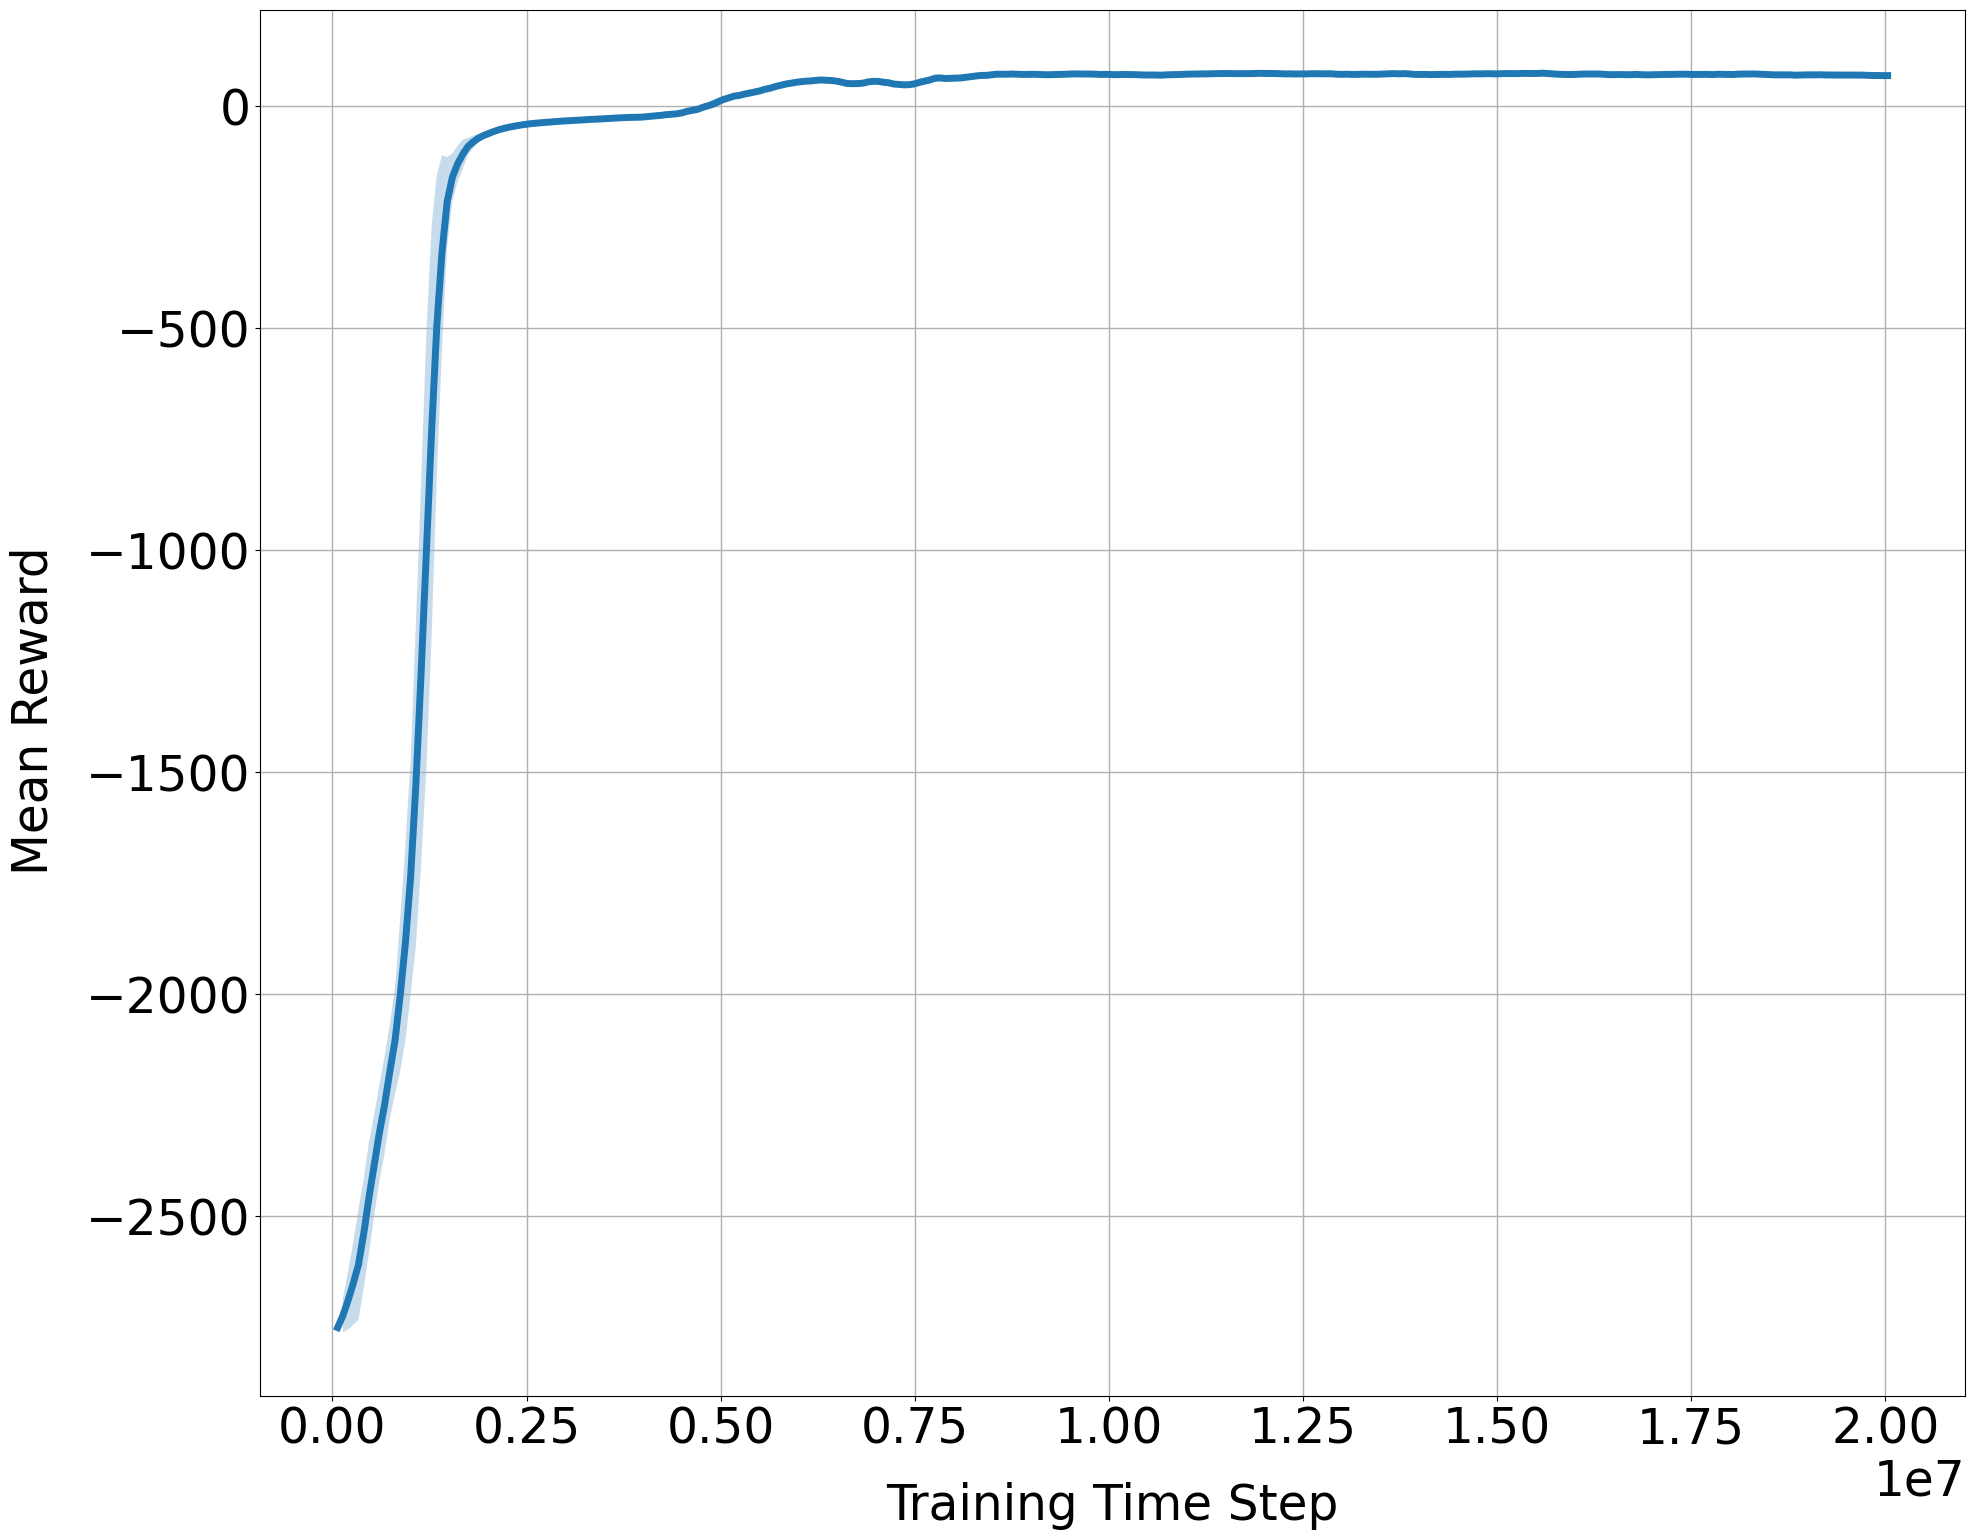

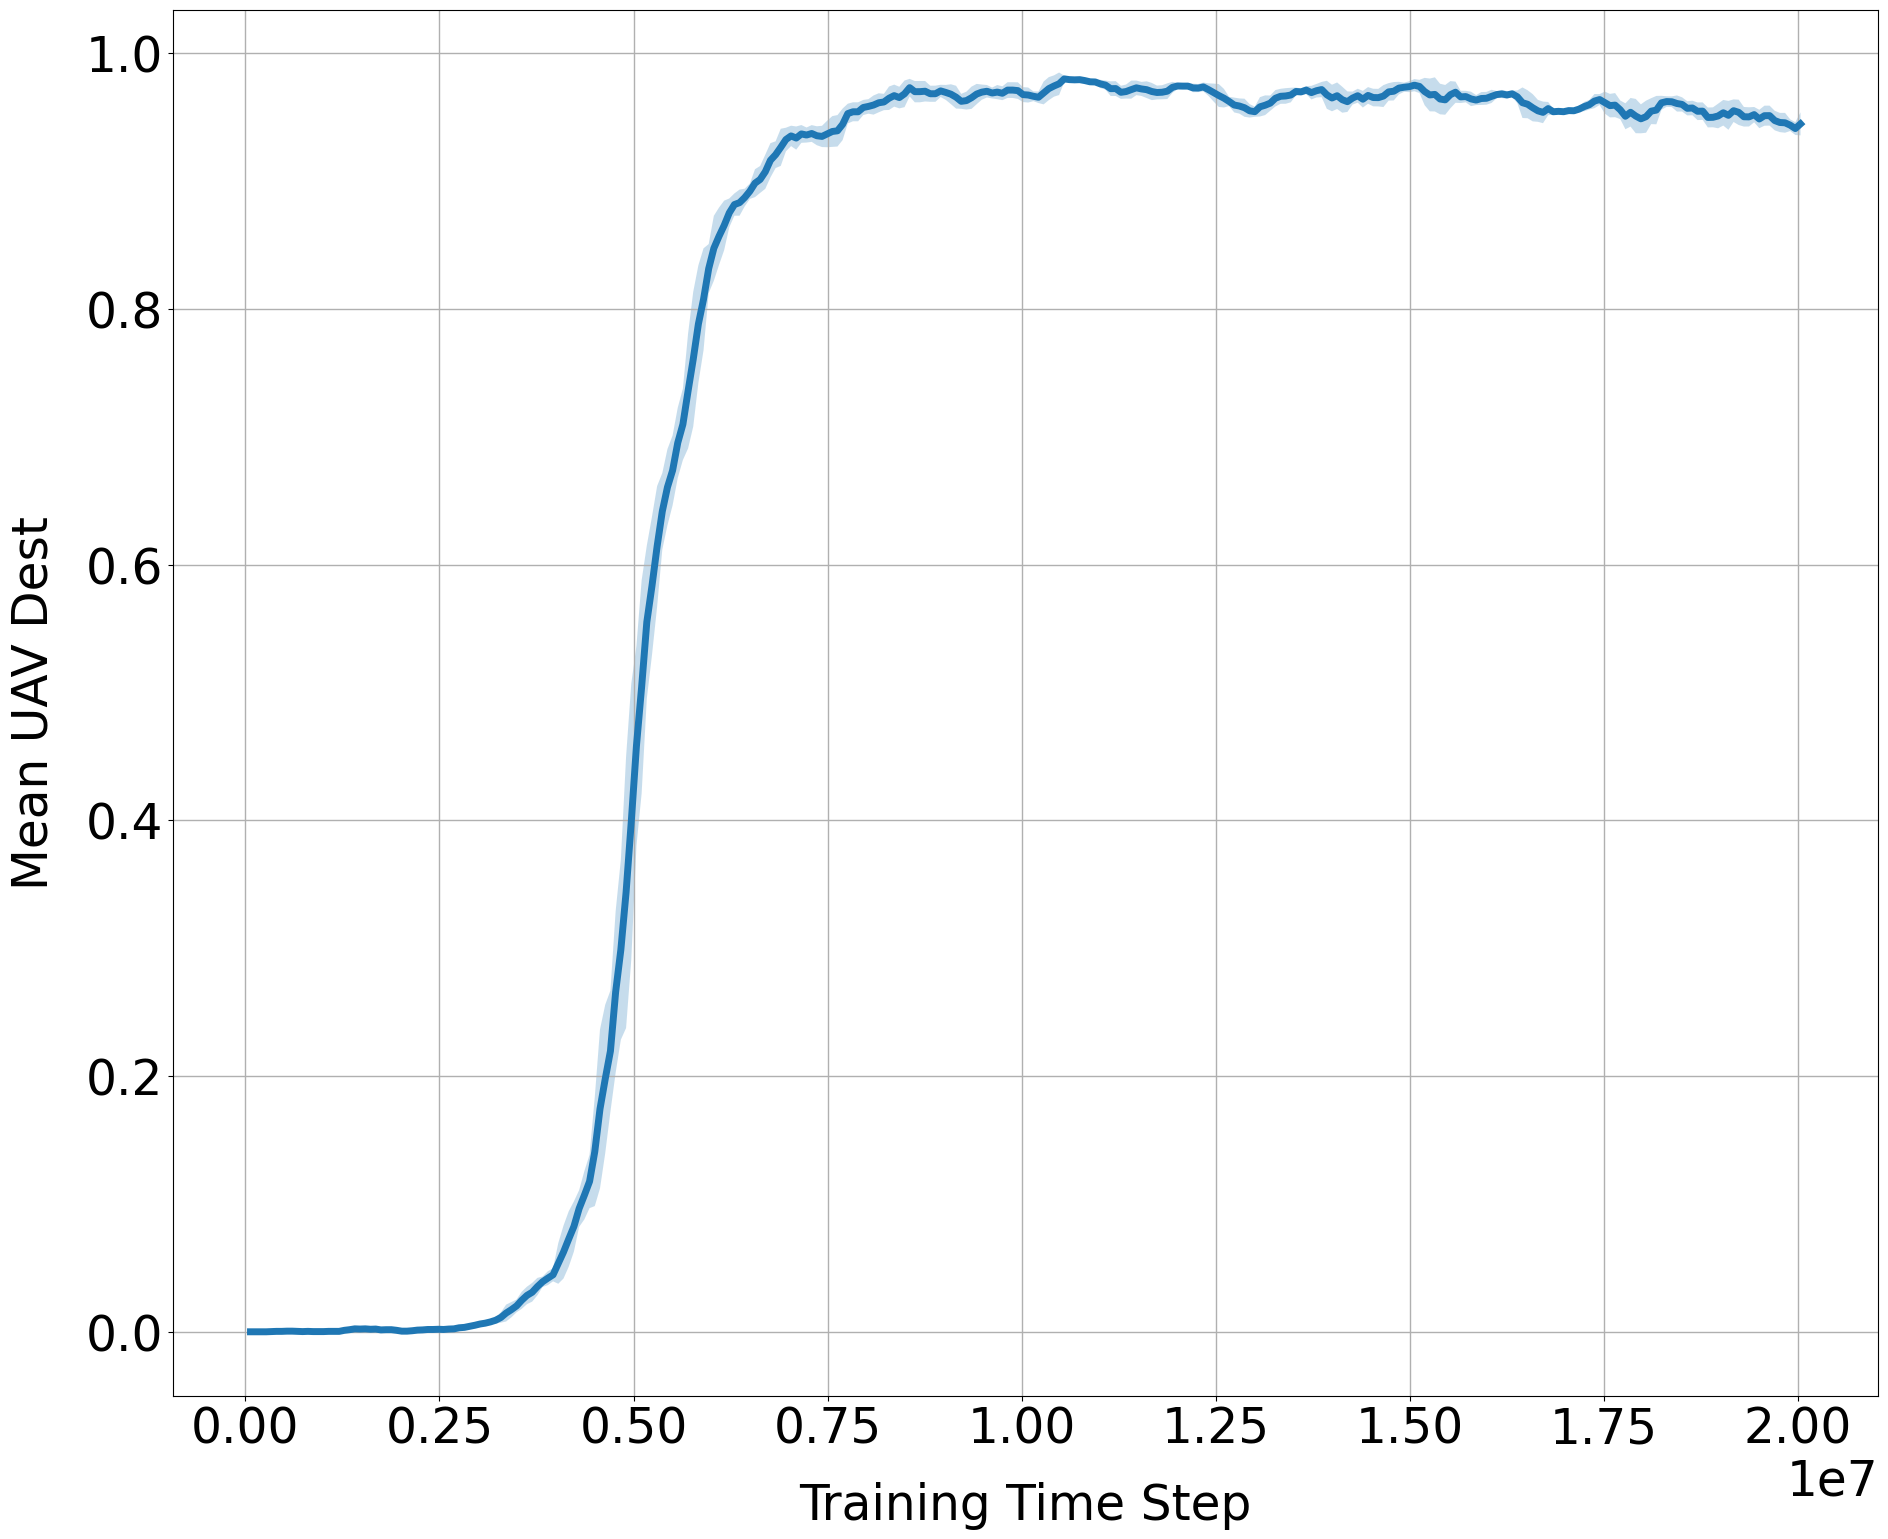

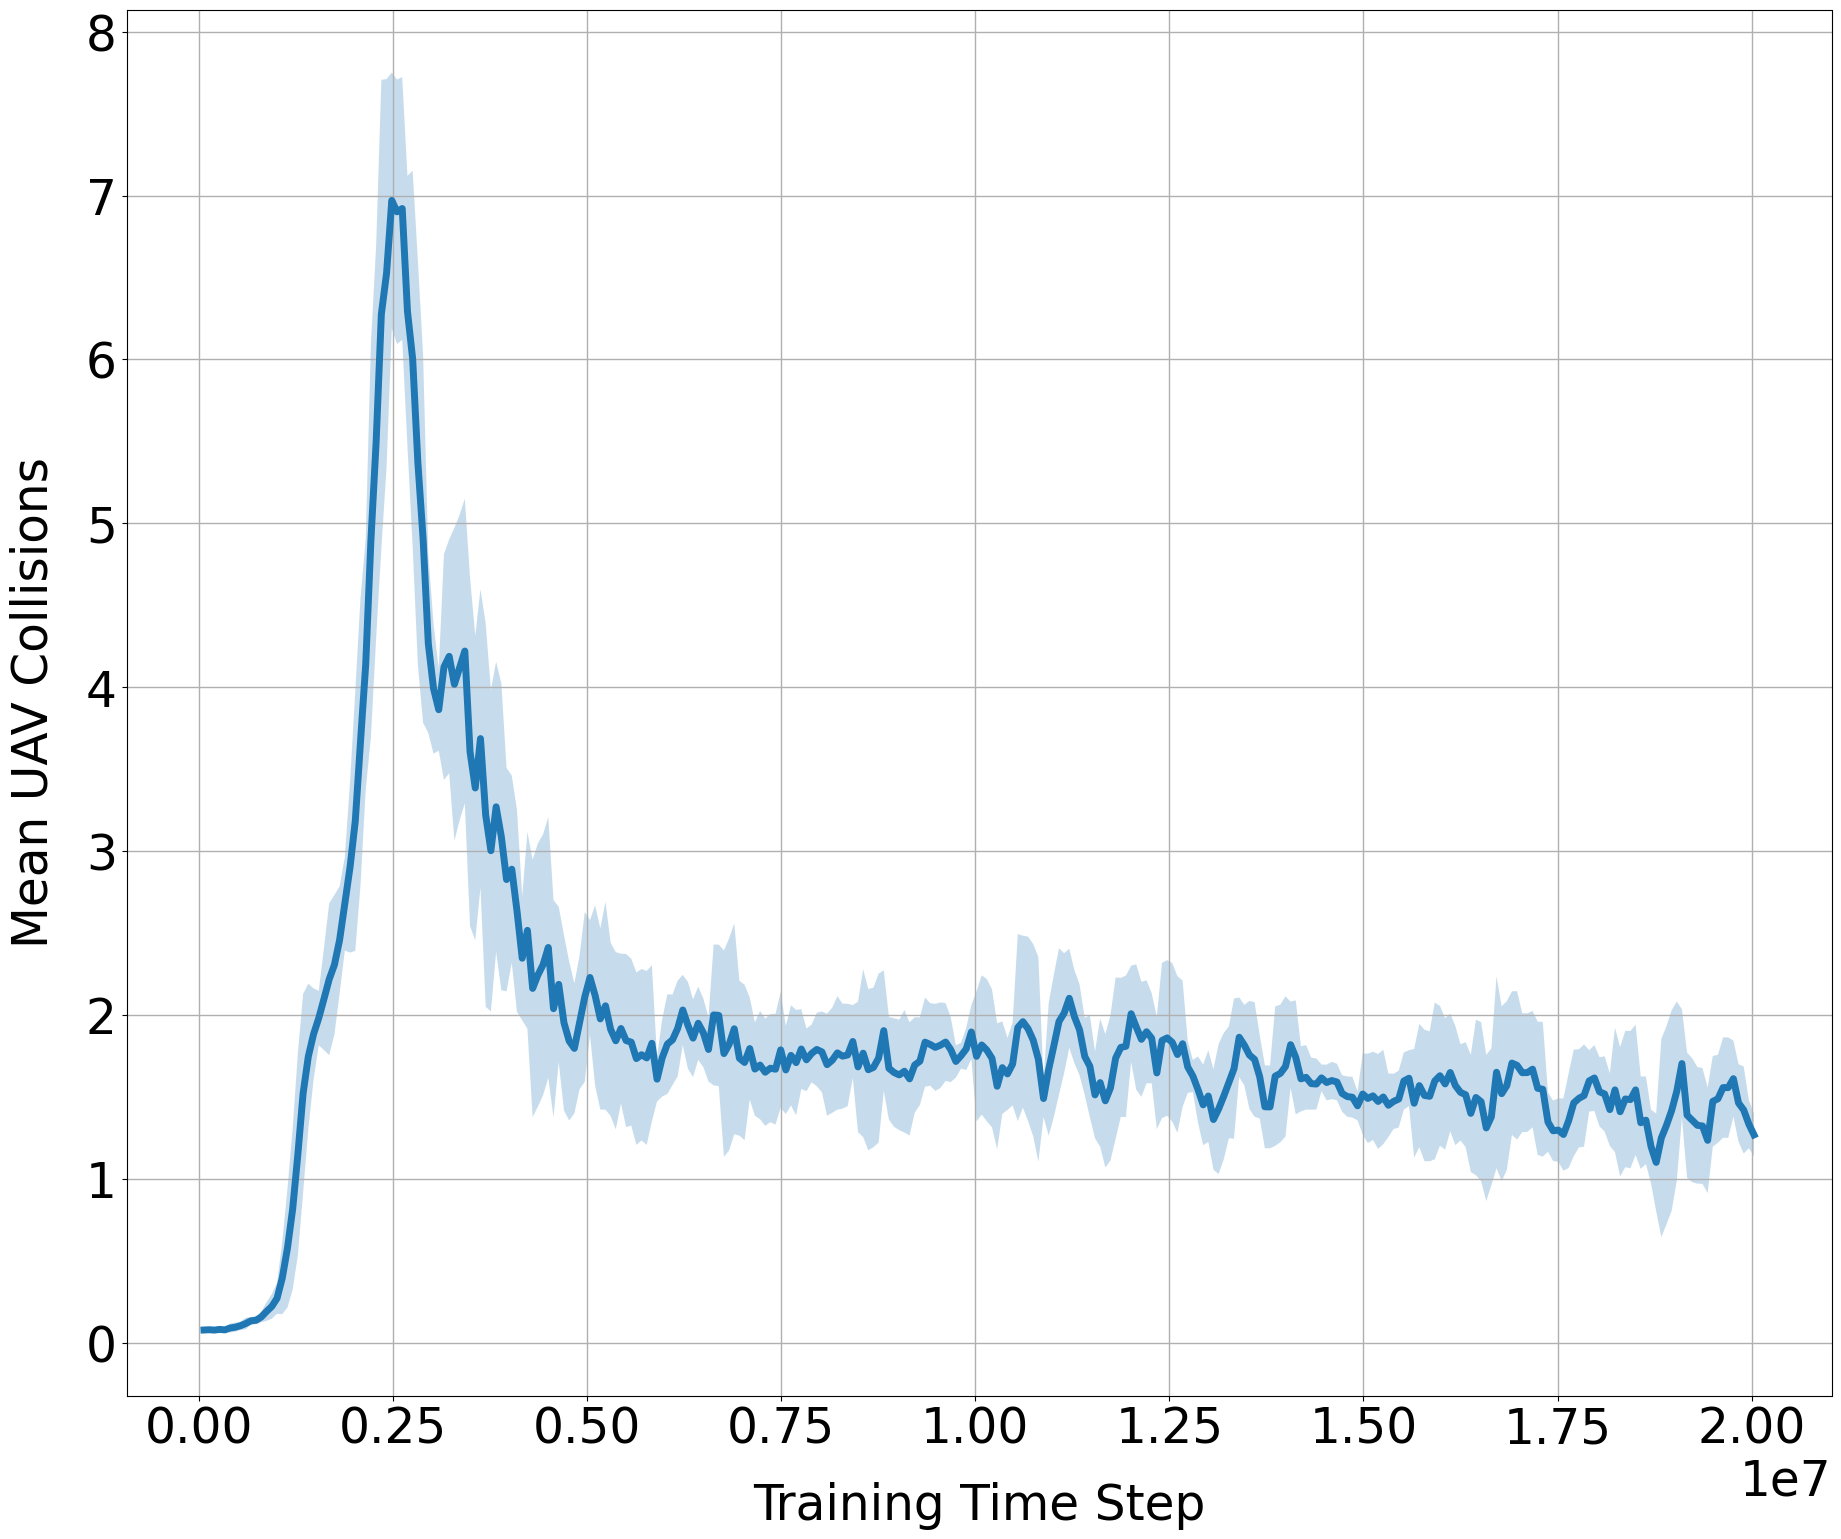

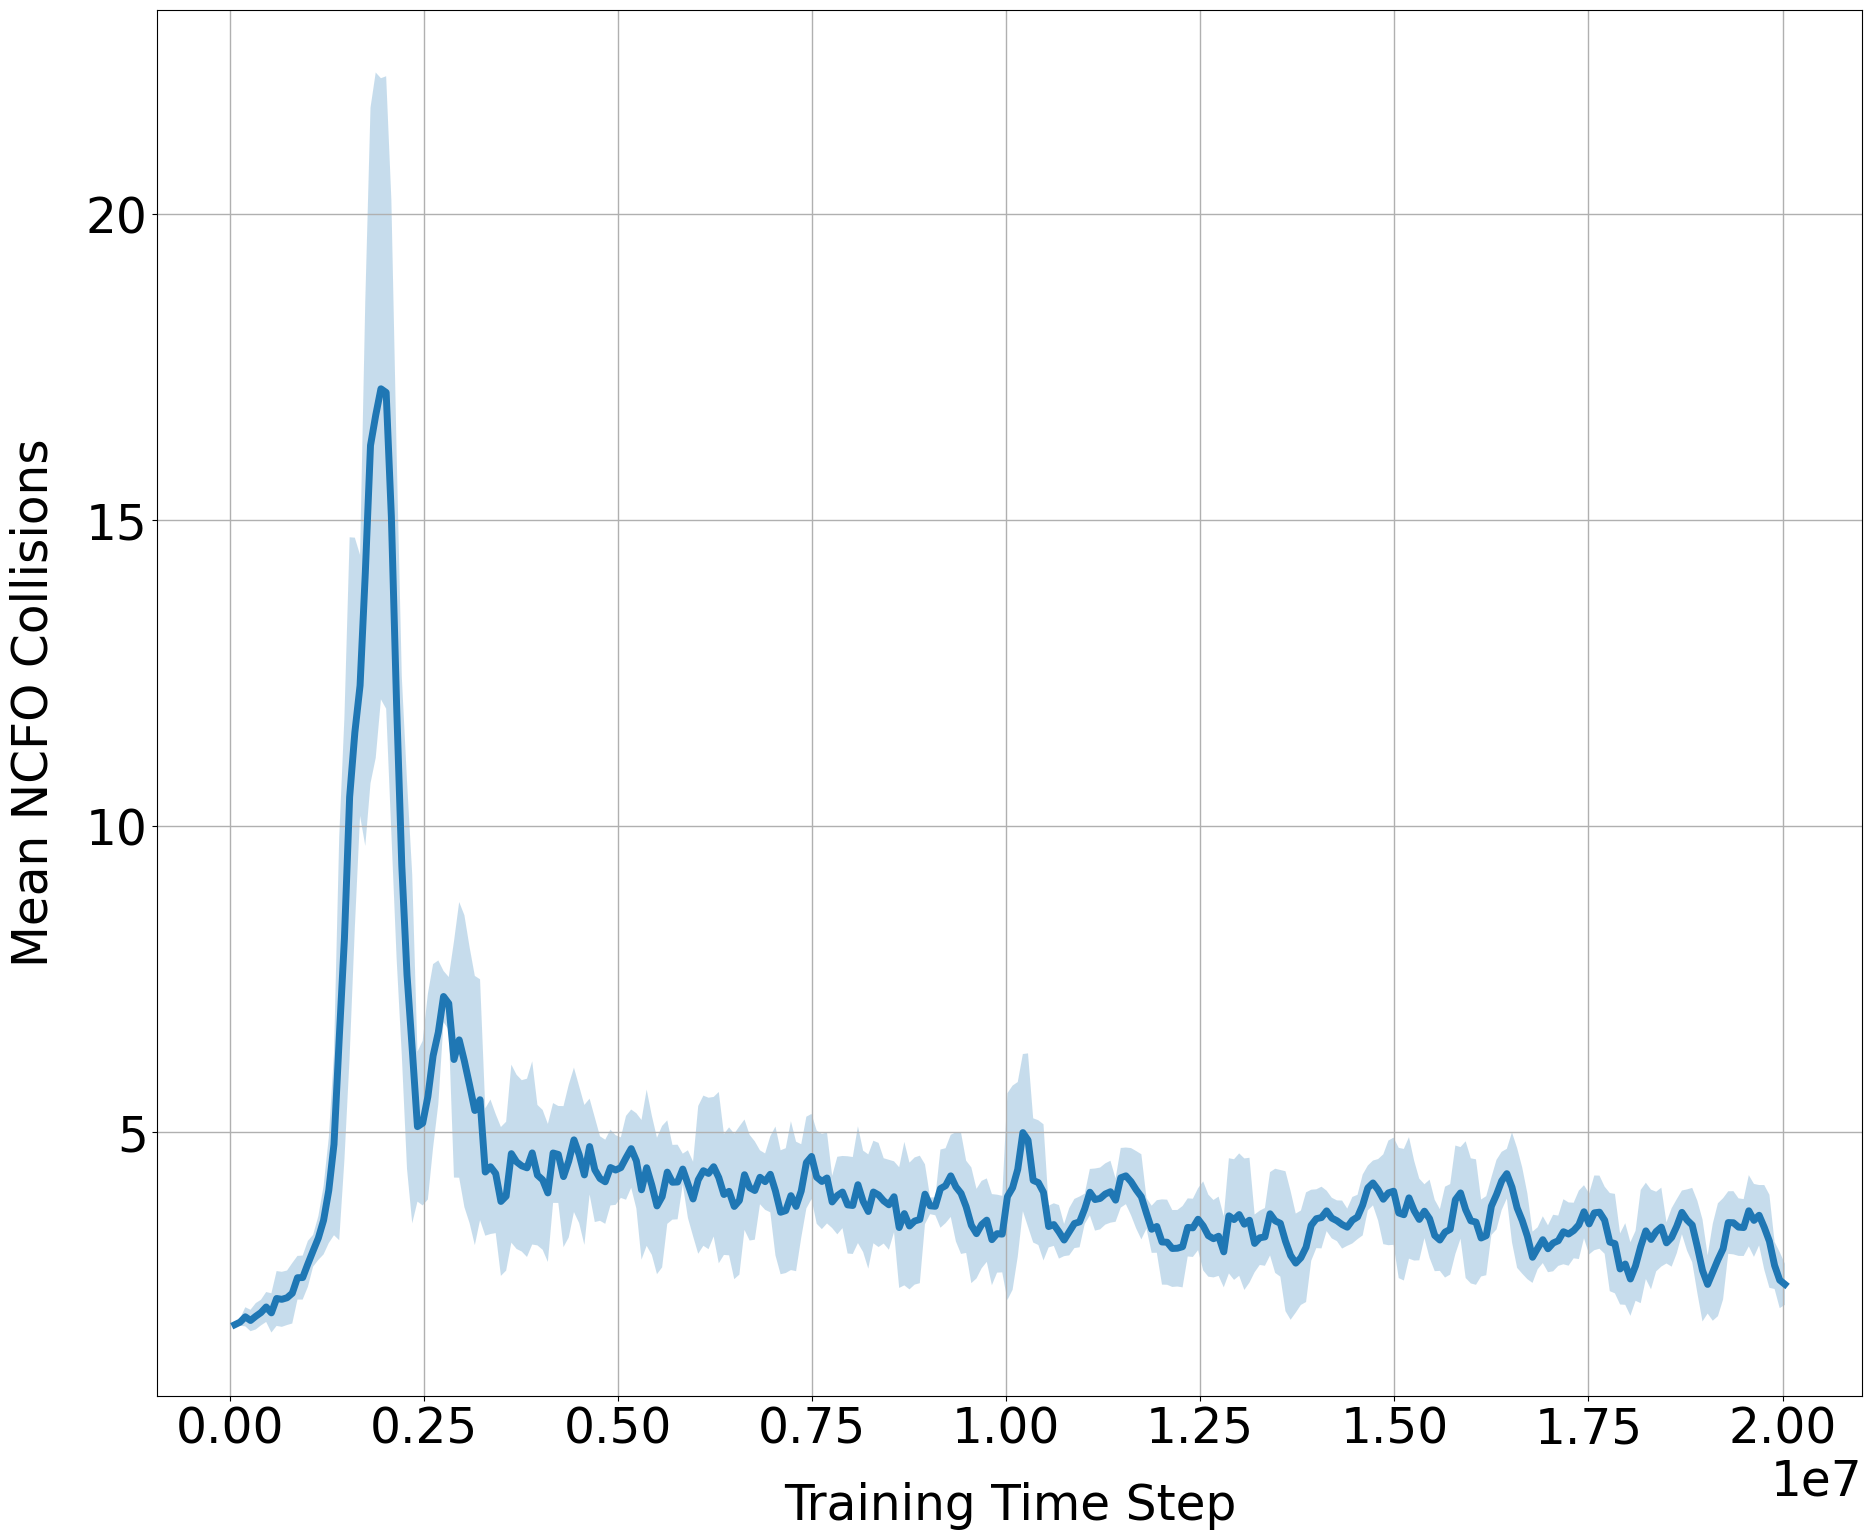

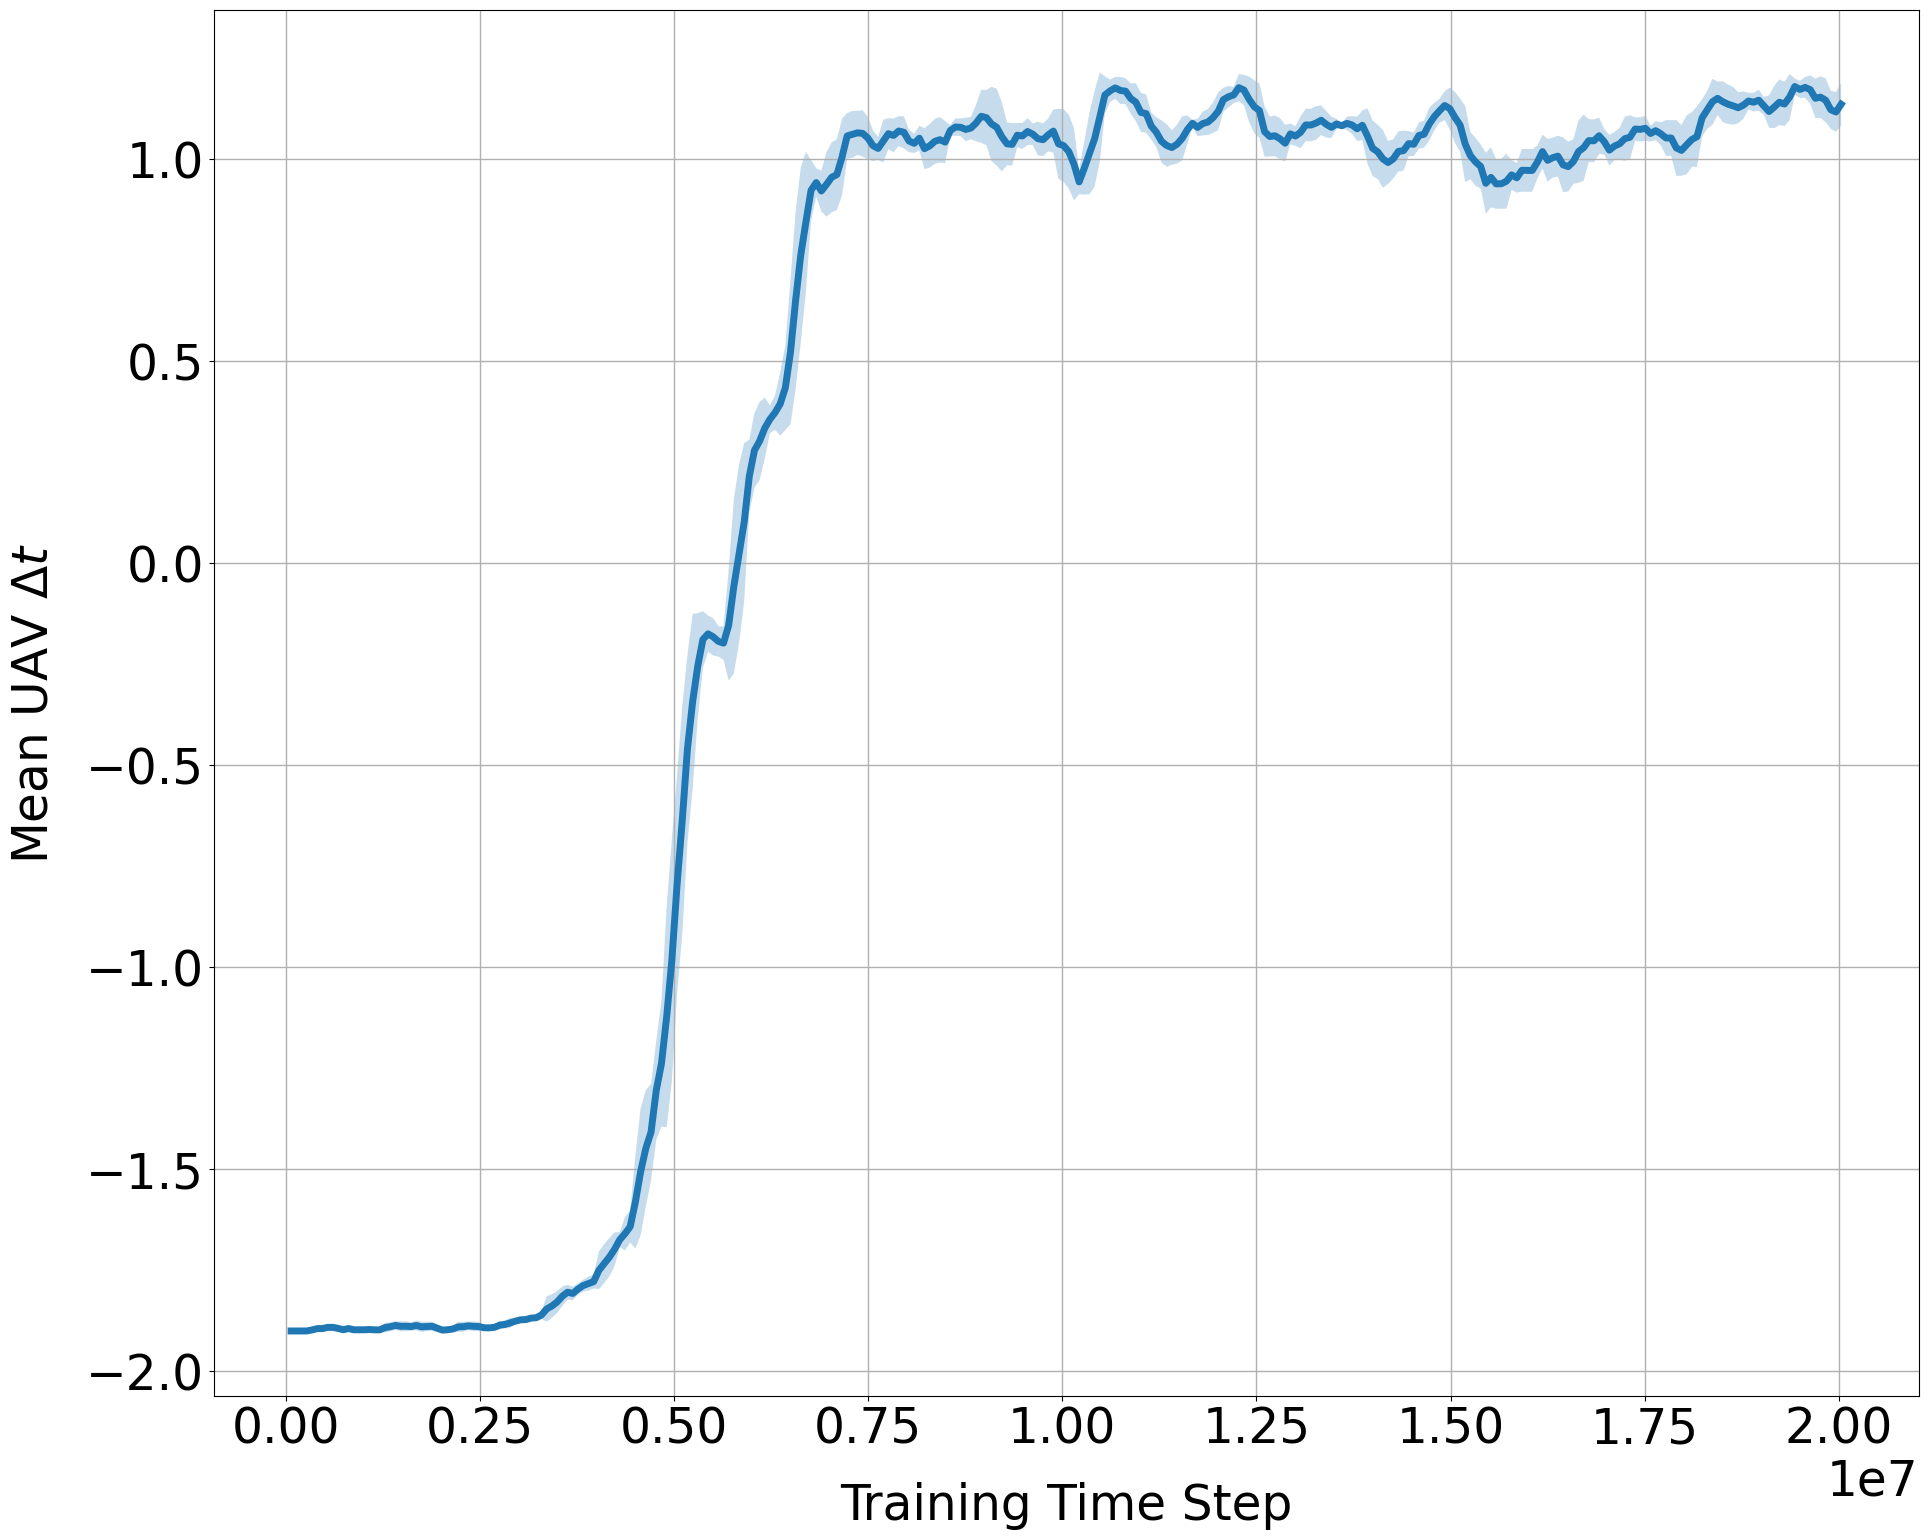

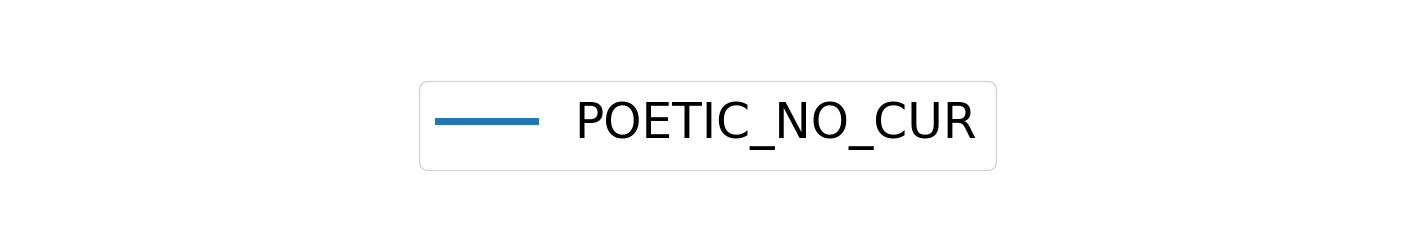

In [21]:

# sns.color_palette("colorblind")

        
def plot_parameters(df_groups, labels_to_plot, parameter_keys, labels_keys, fig_name, window_size=5, x_variable='training_iteration', x_label='Training Iteration'):
    for parameter_key, parameter in parameter_keys.items():

        # fig, ax = plt.subplots(figsize=(12, 10))
        fig, ax = plt.subplots()
        # ax.set_prop_cycle('color', sns.color_palette("tab10",len(labels_to_plot)))

        # for label in labels_to_plot:
        for label, key in labels_keys.items():
            # get the key
            # key = labels_keys[label]
            # get the serie to plot
            serie_to_plot = df_groups.get_group(key)
            x_var = serie_to_plot[x_variable].to_numpy()
            variable = serie_to_plot[parameter]
            
            running_mean = variable.rolling(window_size, min_periods=1).mean().to_numpy()
            running_std = variable.rolling(window_size, min_periods=1).std().to_numpy()
            ax.fill_between(x_var, running_mean+running_std, running_mean-running_std, 
                        alpha=0.25)
            # sns.lineplot(x=x_var, y=running_mean)
            ax.plot(x_var, running_mean, label=label)
            # ax.grid()
            # ax.legend()
            ax.set_xlabel(x_label)
            ax.set_ylabel(parameter_key)
            
            fig.savefig(os.path.join(image_output_folder,f"{fig_name}_{parameter.replace('/', '_')}.png")) 

    figsize = (18, 3)
    fig_leg = plt.figure(figsize=figsize)
    ax_leg = fig_leg.add_subplot(111)
    # add the legend from the previous axes
    ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3)
    # hide the axes frame and the x/y labels
    ax_leg.axis('off')
    fig_leg.savefig(os.path.join(image_output_folder, 'ppo_train_legend.png'))   
      
plot_parameters(df_groups, labels_to_plot, parameter_keys, labels_keys, x_variable="timesteps_total", x_label="Training Time Step", fig_name="ppo_vs_ppo_no_cur")

In [22]:
# Get the total time it takes to train the models
for label, key in labels_keys.items():
    # get the serie to plot
    serie_to_plot = df_groups.get_group(key)
    print(f"model_name: {label}")
    time_total_s = serie_to_plot['time_total_s'].max()
    m, s = divmod(time_total_s,  60)
    h, m = divmod(m, 60)
    # time_total_h = time_total_s / 3600
    print(f"total time (s): {serie_to_plot['time_total_s'].max()}")
    print(f'h:m:s: \t{h:.0f}:{m:.0f}:{s:.2f}')
    # print(f"total time (m): {time_total_m}")
    # print(f"total time (h): {time_total_h}")

model_name: POETIC_NO_CUR
total time (s): 13717.905137300491
h:m:s: 	3:48:37.91
